In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('finetune_eval.csv')

In [10]:
df[df["test_dataset"] == "master-testset"].head(16)[["model", "test_loss", "test_accuracy", "test_balanced_accuracy", "test_precision", "test_recall", "test_f1", "test_auc"]]

,model,test_loss,test_accuracy,test_balanced_accuracy,test_precision,test_recall,test_f1,test_auc
0,Phi-3-mini-128k-instruct,0.044433,0.993060,0.993084,0.996593,0.989598,0.993083,0.999704
2,Qwen2-7B-Instruct,0.048367,0.993839,0.993822,0.996987,0.990605,0.993786,0.999698
3,Llama-3.1-8B-Instruct,0.044314,0.994508,0.994502,0.996373,0.992594,0.994480,0.999720
21,Mistral-Nemo-Instruct-2407,0.054131,0.993582,0.993526,0.996594,0.990321,0.993448,0.999711
24,Llama-3.2-3B-Instruct,0.050738,0.993697,0.993692,0.995157,0.992182,0.993667,0.999713
35,Phi-3-medium-128k-instruct,0.047842,0.994629,0.994649,0.997484,0.991833,0.994651,0.999751
39,Falcon3-7B-Instruct,0.049457,0.993749,0.993697,0.996147,0.991080,0.993607,0.999688
49,Qwen2.5-14B-Instruct,0.050923,0.993202,0.993186,0.996148,0.990160,0.993145,0.999665
50,Ministral-8B-Instruct-2410,0.047617,0.994055,0.994025,0.995597,0.992288,0.993940,0.999725
62,Phi-3-small-128k-instruct,0.055938,0.994892,0.994884,0.996984,0.992749,0.994862,0.999690


In [13]:
final = pd.DataFrame()
for i in range(6):
    tmp = df[df["test_dataset"] == f"master-testset-hard-{i}"].sort_values(by="test_accuracy", ascending=False).head(1)
    final = pd.concat([final, tmp])

In [14]:
# make test_dataset first column, keep all columns
final = final.reset_index(drop=True)
final = final[['test_dataset'] + [col for col in final.columns if col != 'test_dataset']]
final

,test_dataset,model,train_dataset,test_loss,test_accuracy,test_balanced_accuracy,test_precision,test_recall,test_f1,test_auc
0,master-testset-hard-0,phi-4,master-large,0.054593,0.994280,0.994280,1.0,0.994280,0.997132,NaN
1,master-testset-hard-1,Ministral-8B-Instruct-2410,master-large,0.002103,0.999536,0.999536,1.0,0.999536,0.999768,NaN
2,master-testset-hard-2,Mistral-Nemo-Instruct-2407,master-large,0.001734,0.999813,0.999813,1.0,0.999813,0.999906,NaN
3,master-testset-hard-3,phi-4,master-large,0.005927,0.999621,0.999621,1.0,0.999621,0.999810,NaN
4,master-testset-hard-4,phi-4,master-large,0.001944,0.999920,0.999920,1.0,0.999920,0.999960,NaN
5,master-testset-hard-5,phi-4,master-large,0.003258,0.999851,0.999851,1.0,0.999851,0.999925,NaN


In [15]:
final[["test_dataset","model", "test_loss", "test_accuracy", "test_balanced_accuracy", "test_precision", "test_recall", "test_f1", "test_auc"]]

,test_dataset,model,test_loss,test_accuracy,test_balanced_accuracy,test_precision,test_recall,test_f1,test_auc
0,master-testset-hard-0,phi-4,0.054593,0.994280,0.994280,1.0,0.994280,0.997132,NaN
1,master-testset-hard-1,Ministral-8B-Instruct-2410,0.002103,0.999536,0.999536,1.0,0.999536,0.999768,NaN
2,master-testset-hard-2,Mistral-Nemo-Instruct-2407,0.001734,0.999813,0.999813,1.0,0.999813,0.999906,NaN
3,master-testset-hard-3,phi-4,0.005927,0.999621,0.999621,1.0,0.999621,0.999810,NaN
4,master-testset-hard-4,phi-4,0.001944,0.999920,0.999920,1.0,0.999920,0.999960,NaN
5,master-testset-hard-5,phi-4,0.003258,0.999851,0.999851,1.0,0.999851,0.999925,NaN


In [29]:
df_llm = pd.read_csv("finetune_eval.csv")
df_llm = df_llm[df_llm["test_dataset"] == "master-testset"]

In [30]:
df_b = pd.read_csv("baseline_eval.csv")
df_b = df_b[df_b["test_dataset"] == "master-testset"]

In [28]:
df_b

,model,train_dataset,test_dataset,test_loss,test_accuracy,test_balanced_accuracy,test_precision,test_recall,test_f1,test_auc
0,large,master-medium,master-testset,0.203334,0.970577,0.970575,0.971012,0.969922,0.970467,0.995304
7,mini,master-mini,master-testset,0.258197,0.959400,0.959397,0.960103,0.958365,0.959233,0.992566
14,medium,master-small,master-testset,0.264157,0.966107,0.966116,0.963384,0.968821,0.966095,0.992243
21,large,master-mini,master-testset,0.316462,0.948232,0.948267,0.938464,0.959017,0.948629,0.989482
28,small,master-large,master-testset,0.099153,0.987319,0.987311,0.989520,0.984988,0.987249,0.998022
35,medium,master-medium,master-testset,0.180772,0.974625,0.974620,0.975875,0.973144,0.974508,0.995802
42,large,master-large,master-testset,0.173381,0.974657,0.974670,0.970476,0.978932,0.974686,0.996434
49,mini,master-small,master-testset,0.188037,0.970640,0.970638,0.970928,0.970139,0.970534,0.995723
56,large,master-small,master-testset,0.257163,0.957146,0.957124,0.963263,0.950258,0.956717,0.992409
63,mini,master-medium,master-testset,0.125476,0.981498,0.981491,0.983392,0.979418,0.981401,0.997884


In [31]:
model_sizes_llm = {
    # Meta
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": 70_000_000_000,
    "Llama-3.2-3B-Instruct": 3_000_000_000,
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": 70_000_000_000,

    # Microsoft
    "Phi-3-mini-128k-instruct": 4_000_000_000,
    "Phi-3-small-128k-instruct": 7_000_000_000,
    "Phi-3-medium-128k-instruct": 14_000_000_000,
    "Phi-3.5-mini-instruct": 4_000_000_000,
    "Phi-4-mini-instruct": 4_000_000_000,
    "phi-4": 14_000_000_000,

    # Mistral
    "Mistral-Nemo-Instruct-2407": 12_000_000_000,
    "Ministral-8B-Instruct-2410": 7_000_000_000,

    # Qwen
    "Qwen2-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2-7B-Instruct": 7_000_000_000,
    "Qwen2.5-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2.5-14B-Instruct": 14_000_000_000,
    "Qwen2.5-7B-Instruct": 7_000_000_000,
    "Qwen2.5-3B-Instruct": 3_000_000_000,

    # Falcon
    "Falcon3-7B-Instruct": 7_000_000_000,
    "Falcon3-3B-Instruct": 3_000_000_000,
}
model_sizes_b = {"mini": 50_000_000, "small": 100_000_000, "medium": 170_000_000, "large": 340_000_000}

In [32]:
df_llm["model_size"] = df_llm["model"].map(model_sizes_llm)
df_b["model_size"] = df_b["model"].map(model_sizes_b)

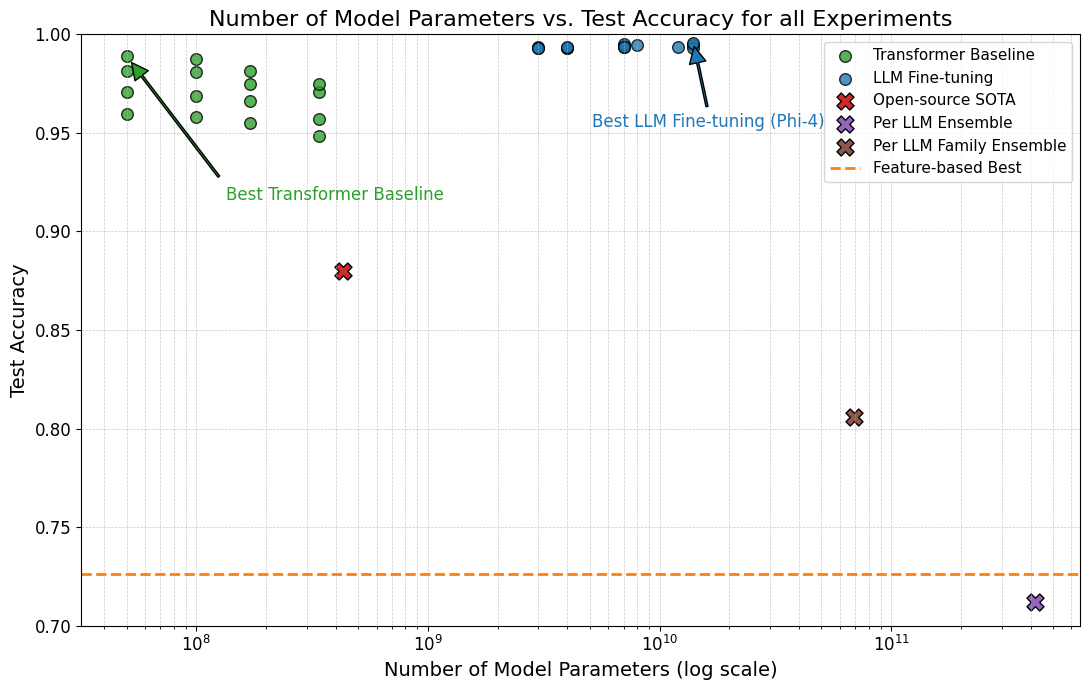

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 7))

plt.scatter(df_b["model_size"], df_b["test_accuracy"],
            color='#2ca02c', label='Transformer Baseline', edgecolor='black', alpha=0.8, s=70)

plt.scatter(df_llm["model_size"], df_llm["test_accuracy"],
            color='#1f77b4', label='LLM Fine-tuning', edgecolor='black', alpha=0.8, s=70)

plt.scatter(430_000_000, 0.88,
            color='#d62728', label='Open-source SOTA', marker='X', s=150, edgecolor='black')

plt.scatter(416_000_000_000, 0.712,
            color='#9467bd', label='Per LLM Ensemble', marker='X', s=150, edgecolor='black')

plt.scatter(69_000_000_000, 0.8061, label="Per LLM Family Ensemble", marker='X', s=150, edgecolor='black', color='#8c564b')

plt.axhline(y=0.726, color='#ff7f0e', linestyle='--', linewidth=2, label='Feature-based Best')

max_llm_idx = df_llm["test_accuracy"].idxmax()
max_b_idx = df_b["test_accuracy"].idxmax()

max_llm_x = df_llm.loc[max_llm_idx, "model_size"]
max_llm_y = df_llm.loc[max_llm_idx, "test_accuracy"]

max_b_x = df_b.loc[max_b_idx, "model_size"]
max_b_y = df_b.loc[max_b_idx, "test_accuracy"]

plt.annotate('Best LLM Fine-tuning (Phi-4)',
             xy=(max_llm_x, max_llm_y),
             xytext=(max_llm_x*1.16, max_llm_y-0.04),
             ha='center', va='center',
             textcoords='data',
             arrowprops=dict(facecolor='#1f77b4', shrink=0.05, width=1.5, 
                             connectionstyle="arc3,rad=0"),
             fontsize=12, color='#1f77b4')

plt.annotate('Best Transformer Baseline',
             xy=(max_b_x, max_b_y),
             xytext=(150, -100),  # offset 80 points right, 40 points down from the point
             textcoords='offset points',
             ha='center', va='center',
             arrowprops=dict(facecolor='#2ca02c', shrink=0.05, width=1.5, 
                             connectionstyle="arc3,rad=0"),
             fontsize=12, color='#2ca02c')

plt.xlabel("Number of Model Parameters (log scale)", fontsize=14)
plt.ylabel("Test Accuracy", fontsize=14)
plt.title("Number of Model Parameters vs. Test Accuracy for all Experiments", fontsize=16)

plt.xscale('log')
plt.ylim(0.7, 1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=11, frameon=True, loc='upper right')
plt.tight_layout()
plt.show()
